In [1]:
# Extract from https://github.com/StanfordVL/behavior/blob/main/behavior/benchmark/behavior_benchmark.py
import os
import numpy as np

from PIL import Image
from igibson.utils.utils import parse_config

from igibson import object_states
from igibson.utils.utils import restoreState

from igibson.action_primitives.fetch_robot_semantic_actions_env import FetchRobotSemanticActionEnv
from igibson.custom_utils import get_env_config, print_properties
from igibson.primitives_utils import get_names_of_visible_obj_inside, get_objects_inside, settle_physics 
import igibson.render_utils as render_utils

import warnings
warnings.filterwarnings("ignore")


 _   _____  _  _
(_) / ____|(_)| |
 _ | |  __  _ | |__   ___   ___   _ __
| || | |_ || || '_ \ / __| / _ \ | '_ \
| || |__| || || |_) |\__ \| (_) || | | |
|_| \_____||_||_.__/ |___/ \___/ |_| |_|



/miniconda/envs/igibson/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Env config
task = "cleaning_out_drawers"
scene_id =  "Benevolence_1_int"

# Init env
sim_env = FetchRobotSemanticActionEnv(task, scene_id, verbose=True)

Rendering settings is None - going with the default settings!


### Dev

In [ ]:
sim_env.robot.n_joints

In [ ]:
#for key, val in vars(sim_env.robot).items():
#    print(key)#,val)

In [ ]:
joint_ranges = np.array([
    upper - lower
    for lower, upper in zip(sim_env.robot.joint_lower_limits, sim_env.robot.joint_upper_limits)
])
idxs = sim_env.robot.arm_control_idx[sim_env.robot.default_arm]
print(idxs)
print(sim_env.robot._body_ids[0]) # ok
print(sim_env.robot._links['gripper_link'].link_id) # ok
print(sim_env.robot.joint_lower_limits[idxs]) # ok
print(sim_env.robot.joint_upper_limits[idxs]) # ok
print(joint_ranges[idxs])
print(sim_env.robot.untucked_default_joint_pos[idxs]) # ok

In [ ]:
sim_env.robot._links.keys() # how do we get their ids?

In [ ]:
gripper_link_name = 'gripper_link'  # or 'r_gripper_finger_link' if you're targeting a fingertip
gripper_link = sim_env.robot._links[gripper_link_name]
for key, val in vars(gripper_link).items():
    print(key,val)

In [ ]:
sim_env.robot.controller_action_idx[f"arm_{sim_env.robot.default_arm}"]

In [ ]:
sim_env.robot.controller_action_idx

In [ ]:
sim_env.robot.default_arm # where does this come from???

In [ ]:
# is this what we're looking for? No, it's missing 'left_hand' and 'right_hand' or anything of the sort!
sim_env.robot._ag_obj_in_hand[sim_env.arm] 

In [ ]:
sim_env.robot.is_grasping() # we could change logic, as this accepts the candidate_obj in input as well
# actally it doesn't seem to work anyway...

### Official Demo

In [4]:
plan = [
    #{'action':'go_to', 'params':{'obj_name':'cabinet.n.01_1'}},
    #{'action':'open', 'params':{'obj_name':'cabinet.n.01_1'}}, # TODO: add better prompts for the outer loop + it's failing too often
    {'action':'grasp', 'params':{'obj_name':'bowl.n.01_1'}}, # TODO: make the grasp more realistic somehow 
    #{'action':'grasp', 'params':{'obj_name':'bowl.n.01_2'}},
    #{'action':'grasp', 'params':{'obj_name':'spoon.n.01_1'}},
    #{'action':'grasp', 'params':{'obj_name':'spoon.n.01_2'}},
    {'action':'go_to', 'params':{'obj_name':'sink.n.01_1'}},
    ]

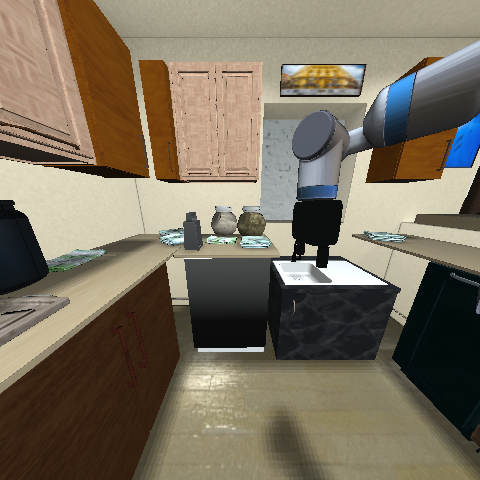

robot_pos: [-0.098967    0.70082895  0.00671286], quaternion_pose: +1.000 +0.000i +0.010j -0.000k

--- Grasp attempt 1/20 ---
Target object position: [0.22451753 0.80004249 1.14368459]


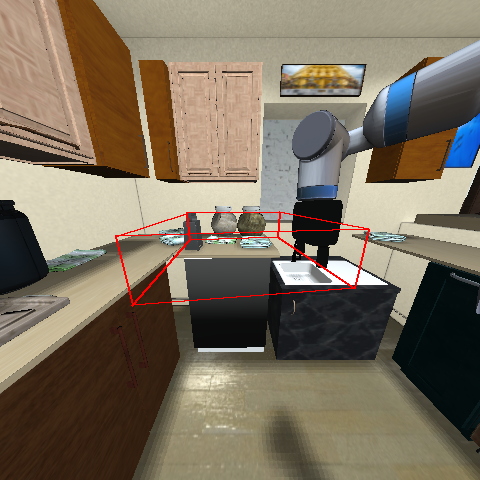

len(grasp_poses):44, len(gps):44, len(grasp_poses[0]):2, len(gps[0]):2


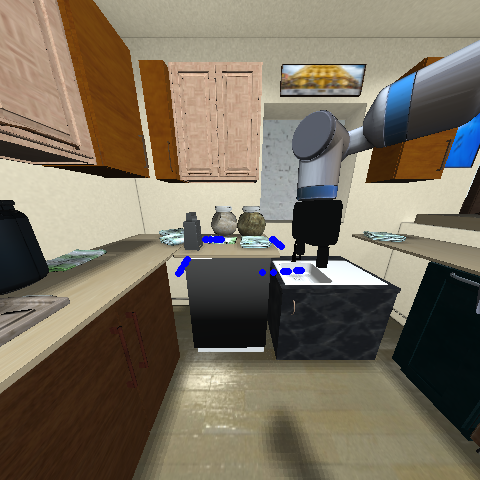

grasp_pose: (array([0.15478443, 0.75165496, 1.12558473]), array([-0.7059047 , -0.04119964,  0.04120146,  0.70590621])) - object_direction: [ 9.93210035e-01  1.16334972e-01 -3.24867099e-06]

==== Gripper Pose Check: before ====
Target Position     : [0.1548 0.7517 1.1256]
Actual Position     : [0.4346 0.5753 1.05  ]
Position Error      : 0.339327 (tol=0.01)
Target Orientation  : [-0.7059 -0.0412  0.0412  0.7059]
Actual Orientation  : [ 0.4557  0.5345 -0.4858  0.5202]
Orientation Error   : 3.134577 (tol=0.01)

==== Gripper Pose Check: after set_join_positions ====
Target Position     : [0.1548 0.7517 1.1256]
Actual Position     : [0.1584 0.7702 1.1255]
Position Error      : 0.018890 (tol=0.01)
Target Orientation  : [-0.7059 -0.0412  0.0412  0.7059]
Actual Orientation  : [-0.7063 -0.04    0.04    0.7056]
Orientation Error   : 0.003486 (tol=0.01)
Step 0: in_hand=None | is_grasping=-1


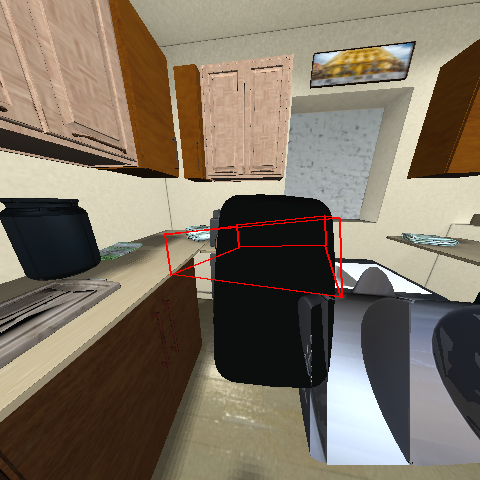

Step 1: in_hand=None | is_grasping=-1
Step 2: in_hand=None | is_grasping=-1


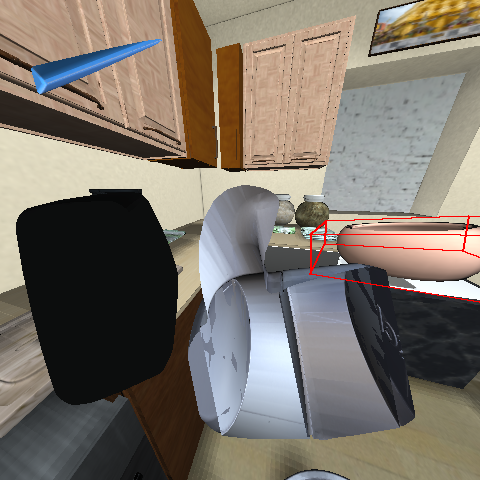

Step 3: in_hand=None | is_grasping=-1
Step 4: in_hand=None | is_grasping=-1


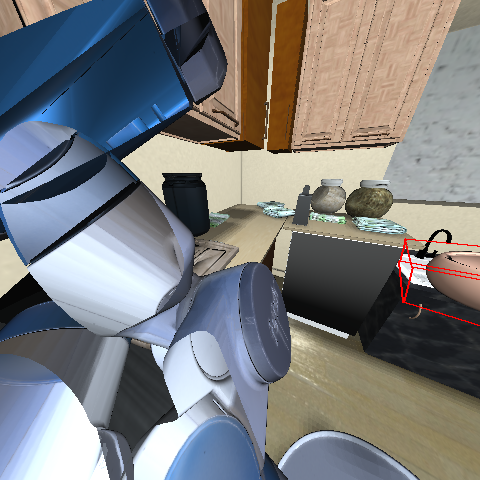

Step 5: in_hand=None | is_grasping=-1
Step 6: in_hand=None | is_grasping=-1


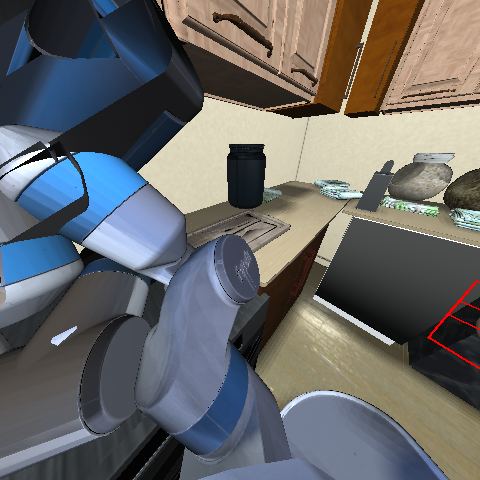

Step 7: in_hand=None | is_grasping=-1
Step 8: in_hand=None | is_grasping=-1


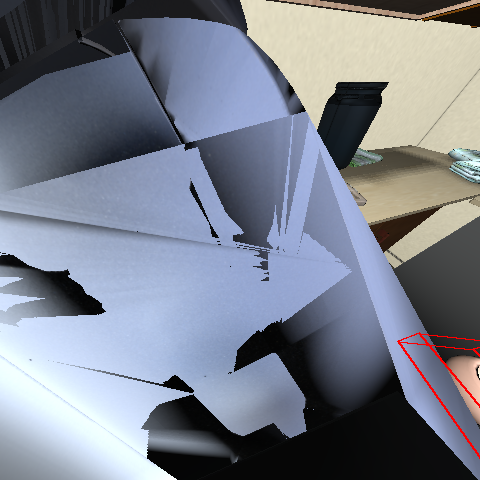

Step 9: in_hand=None | is_grasping=-1
Grasp failed on attempt 1, retrying next sample.

--- Grasp attempt 2/20 ---
Target object position: [0.22451753 0.80004249 1.14368459]


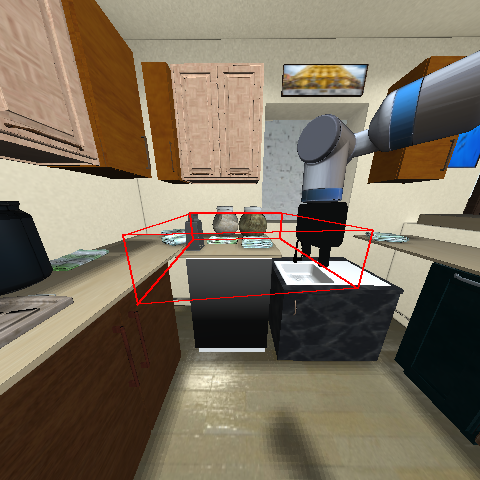

len(grasp_poses):44, len(gps):44, len(grasp_poses[0]):2, len(gps[0]):2


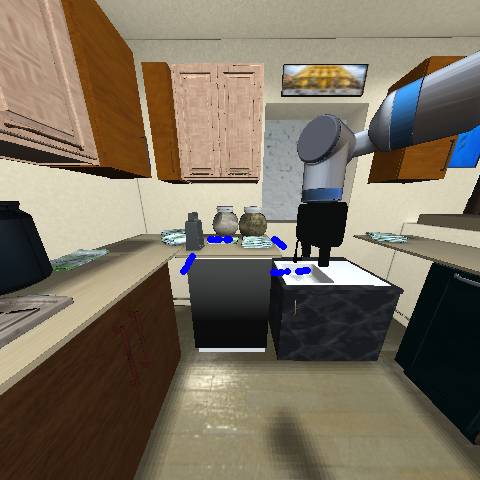

grasp_pose: (array([0.28858093, 0.73227392, 1.12558481]), array([ 0.47001842,  0.52828066, -0.52828633, -0.47001679])) - object_direction: [-1.16333726e-01  9.93210181e-01 -6.44012638e-06]

==== Gripper Pose Check: before ====
Target Position     : [0.2886 0.7323 1.1256]
Actual Position     : [0.4414 0.5636 1.0451]
Position Error      : 0.241407 (tol=0.01)
Target Orientation  : [ 0.47    0.5283 -0.5283 -0.47  ]
Actual Orientation  : [ 0.4517  0.5365 -0.4761  0.5305]
Orientation Error   : 2.099238 (tol=0.01)

==== Gripper Pose Check: after set_join_positions ====
Target Position     : [0.2886 0.7323 1.1256]
Actual Position     : [0.2886 0.7322 1.1256]
Position Error      : 0.000080 (tol=0.01)
Target Orientation  : [ 0.47    0.5283 -0.5283 -0.47  ]
Actual Orientation  : [-0.47   -0.5283  0.5283  0.47  ]
Orientation Error   : 0.000000 (tol=0.01)
Step 0: in_hand=None | is_grasping=-1


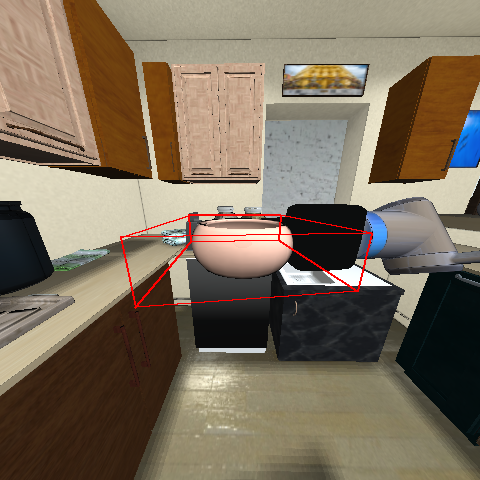

Step 1: in_hand=None | is_grasping=-1
Step 2: in_hand=<igibson.objects.articulated_object.URDFObject object at 0x1517fc664a60> | is_grasping=-1


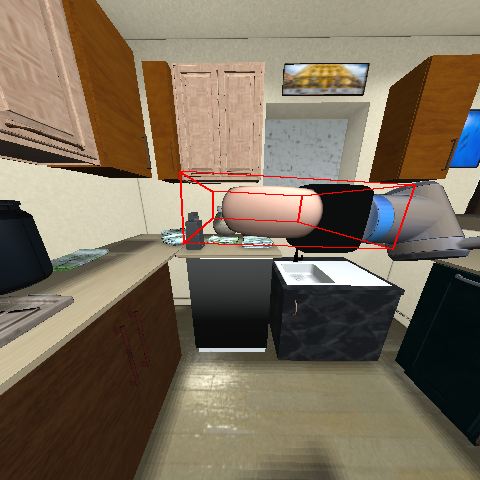

Step 3: in_hand=<igibson.objects.articulated_object.URDFObject object at 0x1517fc664a60> | is_grasping=-1
Step 4: in_hand=<igibson.objects.articulated_object.URDFObject object at 0x1517fc664a60> | is_grasping=-1


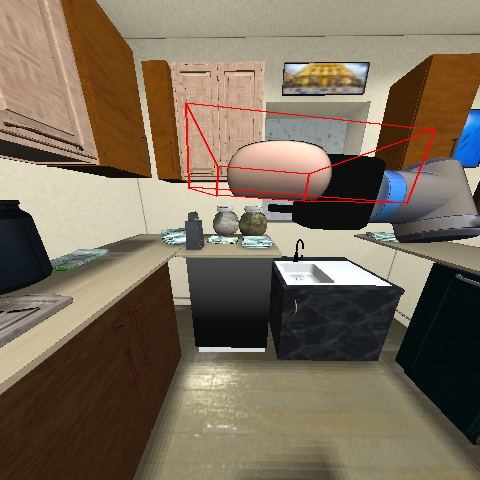

Step 5: in_hand=<igibson.objects.articulated_object.URDFObject object at 0x1517fc664a60> | is_grasping=-1
Step 6: in_hand=<igibson.objects.articulated_object.URDFObject object at 0x1517fc664a60> | is_grasping=-1


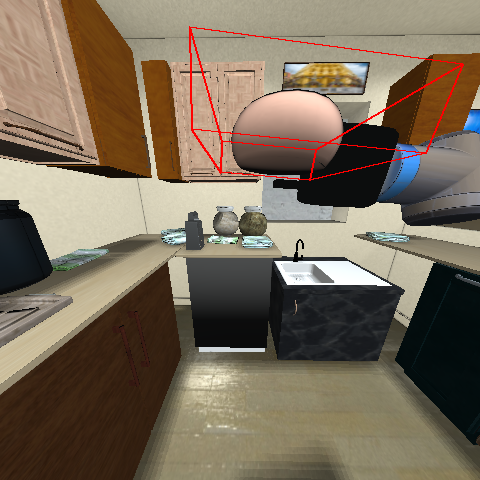

Step 7: in_hand=<igibson.objects.articulated_object.URDFObject object at 0x1517fc664a60> | is_grasping=-1
Step 8: in_hand=<igibson.objects.articulated_object.URDFObject object at 0x1517fc664a60> | is_grasping=-1


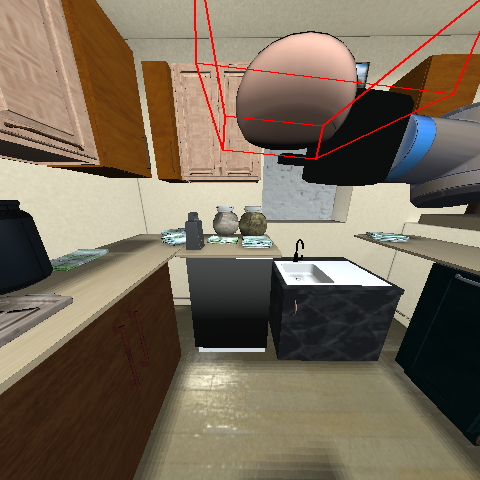

Step 9: in_hand=<igibson.objects.articulated_object.URDFObject object at 0x1517fc664a60> | is_grasping=-1
Grasp succeeded on attempt 2.
Action {'action': 'grasp', 'params': {'obj_name': 'bowl.n.01_1'}} executed. Success: True


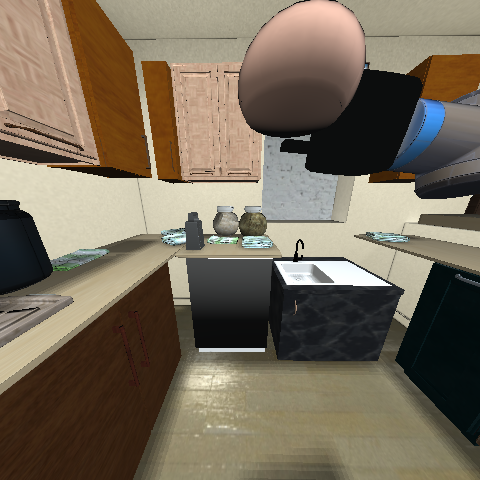

Candidate position failed robot distance test.
Object not visible.
Object not visible.
Start collision test.
torso_lift_link has collision with objects [28]
elbow_flex_link has collision with objects [28]
wrist_flex_link has collision with objects [28]
gripper_link has collision with objects [28]
End collision test.
Candidate position failed collision test.
Object not visible.
Object not visible.
Start collision test.
torso_lift_link has collision with objects [0, 28]
elbow_flex_link has collision with objects [0, 28]
wrist_flex_link has collision with objects [0, 28]
gripper_link has collision with objects [0, 28]
End collision test.
Candidate position failed collision test.
Start collision test.
torso_lift_link has collision with objects [0, 1, 28, 57]
elbow_flex_link has collision with objects [0, 1, 28, 57]
wrist_flex_link has collision with objects [0, 1, 28, 57]
gripper_link has collision with objects [0, 1, 28, 57]
End collision test.
Candidate position failed collision test.
St

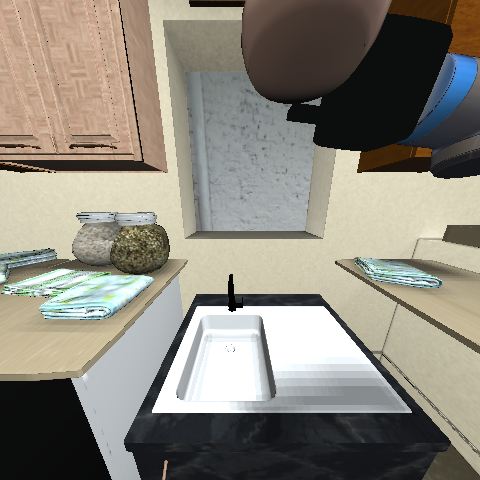

In [5]:
image, symbolic_state = sim_env.get_state_and_image()

# TODO: Render image and print symbolic_state
image.show()

for action in plan:
    try:
        success, image, symbolic_state = sim_env.apply_action(action)
        print(f'Action {action} executed. Success: {success}')
        # TODO: Render image and print symbolic_state
        image.show()
        
        legal = True
        
    except ValueError as e:
        print(f"Action {action} failed: {e}")
        success = False
        legal = False